# VGG 16 Network

In [13]:
# Load the libraries
import tensorflow as tf
from tensorflow.keras import layers, models

### Define a VGG16 Network
Note - The weights used here is pretrained and are stored [here.](https://www.kaggle.com/keras/vgg16?select=vgg16_weights_tf_dim_ordering_tf_kernels.h5)

In [14]:
def VGG_16(weights_path=None):
    model = models.Sequential()
    model.add(layers.ZeroPadding2D((1, 1), input_shape=(224, 224, 3)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.Flatten())
    
    #top layer of the VGG net
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1000, activation='softmax'))
    
    if weights_path:
        model.load_weights(weights_path)

    return model

In [15]:
# Downloading the dataset from kaggle
# %cd drive
# %cd 'My Drive'
# %cd Kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

!kaggle datasets download -d keras/vgg16

vgg16.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Using the predefined weights
import cv2
im = cv2.resize(cv2.imread('/content/drive/My Drive/projects/steam-locomotive.jpg'), (224,224)).astype(np.float32)
# im = im.transpose((2, 0, 1))
im = np.expand_dims(im, axis=0)

# Test the pretrained model
model = VGG_16('/content/drive/My Drive/kaggle/vgg_16_weights_tf_dim_ordering_tf_kernerls.h5')
model.summary()
model.compile(optimizer='sgd', loss='categorical_crossentropy')
out = model.predict(im)
print(np.argmax(out))

# Utilizing tf.keras built-in VGG16 Net module

820


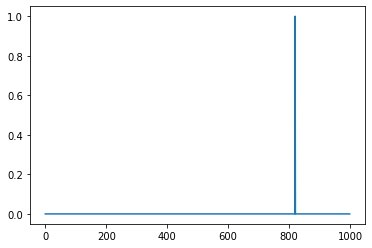

In [31]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2
from IPython.display import Image, display

# prebuild model with pre-trained weights on imagenet
model = VGG16(weights='imagenet', include_top=True)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

# resize into VGG16 trained images' format
image = cv2.imread('/content/drive/My Drive/projects/steam-locomotive.jpg', 1)
im = cv2.resize(image, (224, 224)).astype(np.float32)
im = np.expand_dims(im, axis=0)

# predict
out = model.predict(im)
index = np.argmax(out)
print(index)

plt.plot(out.ravel())
plt.show()